# Image Classification using Logistic Regression

### import required libraries

In [ ]:
import sklearn
# Common imports
import numpy as np
import os
import pandas as pd
# To plot pretty figures 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import bs4
import requests
# Load libraries
import pandas as pd
import seaborn as sns
#from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.model_selection import cross_val_score
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
#from sklearn.feature_selection import RFE
from sklearn import preprocessing

## linear models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

### Preparing datasets

In [ ]:
def fetch_csv_data(url,destination):
    r = requests.get(url)
    folder = bs4.BeautifulSoup(r.text, "html.parser")
    for files in folder.find_all("a"):
        if ".csv" in files["href"]:
            print(url + files["href"])
            r = requests.get(url + files["href"])
            if r.status_code == 200:
                try:
                    with open(os.path.join(destination, files["href"]), "wb") as f:
                        f.write(r.content)
                except:
                    print("Failed To download file "+ files["href"])

In [ ]:
if not os.path.exists('datasets'):
    os.mkdir("datasets")

In [ ]:
fetch_csv_data("https://www.macs.hw.ac.uk/~ek19/data2/","datasets")

https://www.macs.hw.ac.uk/~ek19/data2/x_test_gr_smpl.csv
https://www.macs.hw.ac.uk/~ek19/data2/x_test_smpl_bin.csv
https://www.macs.hw.ac.uk/~ek19/data2/x_train_gr_smpl.csv
https://www.macs.hw.ac.uk/~ek19/data2/x_train_smpl_bin.csv
https://www.macs.hw.ac.uk/~ek19/data2/y_test_smpl.csv
https://www.macs.hw.ac.uk/~ek19/data2/y_test_smpl_0.csv
https://www.macs.hw.ac.uk/~ek19/data2/y_test_smpl_1.csv
https://www.macs.hw.ac.uk/~ek19/data2/y_test_smpl_2.csv
https://www.macs.hw.ac.uk/~ek19/data2/y_test_smpl_3.csv
https://www.macs.hw.ac.uk/~ek19/data2/y_test_smpl_4.csv
https://www.macs.hw.ac.uk/~ek19/data2/y_test_smpl_5.csv
https://www.macs.hw.ac.uk/~ek19/data2/y_test_smpl_6.csv
https://www.macs.hw.ac.uk/~ek19/data2/y_test_smpl_7.csv
https://www.macs.hw.ac.uk/~ek19/data2/y_test_smpl_8.csv
https://www.macs.hw.ac.uk/~ek19/data2/y_test_smpl_9.csv
https://www.macs.hw.ac.uk/~ek19/data2/y_test_smpl_bin.csv
https://www.macs.hw.ac.uk/~ek19/data2/y_train_smpl.csv
https://www.macs.hw.ac.uk/~ek19/data2/y_t

In [ ]:
import os
datasets = {}
directory = 'datasets'
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        #print(os.path.join(directory, filename))
        datasets[filename.split('.')[0]] = pd.read_csv(os.path.join(directory, filename))

#### generate new dataset with ~4000 removed from original training dataset and added to the original test set

---



In [ ]:
X_train_4000,X_test_4000,y_train_4000,y_test_4000 = train_test_split(datasets['x_train_gr_smpl'],datasets['y_train_smpl'],test_size=0.42,random_state=0) 

datasets['x_train_4000_smpl'] = X_train_4000
datasets['y_train_4000_smpl'] = y_train_4000
datasets['x_test_4000_smpl'] = pd.concat([X_test_4000, datasets['x_test_gr_smpl']])
datasets['y_test_4000_smpl'] = pd.concat([y_test_4000, datasets['y_test_smpl']])

print(datasets['x_train_4000_smpl'].shape, datasets['y_train_4000_smpl'].shape, datasets['x_test_4000_smpl'].shape, datasets['y_test_4000_smpl'].shape, sep=' | ')
print(datasets['y_train_4000_smpl']['0'].unique())
print(datasets['y_test_4000_smpl']['0'].unique())


(5620, 2304) | (5620, 1) | (7160, 2304) | (7160, 1)
[4 3 1 2 8 6 5 0 7 9]
[4 3 7 2 1 8 5 6 0 9]


#### generate new dataset with ~9000 removed from original training dataset and added to the original test set

In [ ]:
X_train_9000,X_test_9000,y_train_9000,y_test_9000 = train_test_split(datasets['x_train_gr_smpl'],datasets['y_train_smpl'],test_size=0.93,random_state=0) 

datasets['x_train_9000_smpl'] = X_train_9000
datasets['y_train_9000_smpl'] = y_train_9000
datasets['x_test_9000_smpl'] = pd.concat([X_test_9000, datasets['x_test_gr_smpl']])
datasets['y_test_9000_smpl'] = pd.concat([y_test_9000, datasets['y_test_smpl']])

print(datasets['x_train_9000_smpl'].shape, datasets['y_train_9000_smpl'].shape, datasets['x_test_9000_smpl'].shape, datasets['y_test_9000_smpl'].shape, sep=' | ')
print(datasets['y_train_9000_smpl']['0'].unique())
print(datasets['y_test_9000_smpl']['0'].unique())

(678, 2304) | (678, 1) | (12102, 2304) | (12102, 1)
[4 1 8 3 2 5 9 6 0 7]
[4 3 7 2 1 8 5 6 0 9]


#### Plot the class distribution in each Y dataset

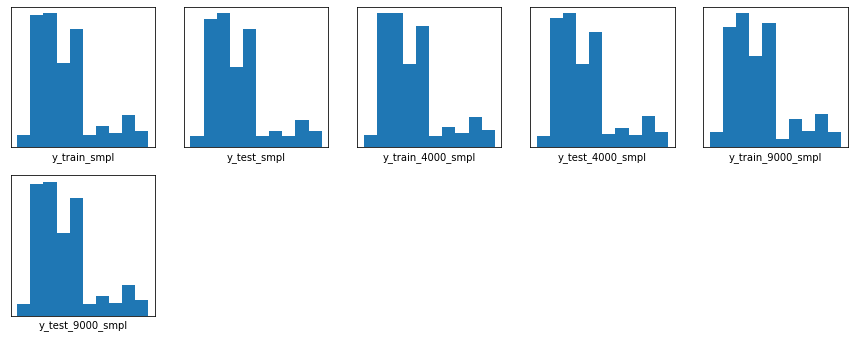

In [ ]:
plt.figure(figsize=(15,15))
i=0
for key, value in datasets.items():
  if key.startswith('y_') and key.endswith('smpl'):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.hist(value['0'], bins = 10)
    plt.xlabel(key)
    i = i+1
plt.show()

In [ ]:
class_names = ['speed limit 20', 'speed limit 30', 'speed limit 50', 'speed limit 60', 'speed limit 70', 'left turn',
              'right turn', 'beware pedestrian crossing', 'beware children', 'beware cycle route ahead']

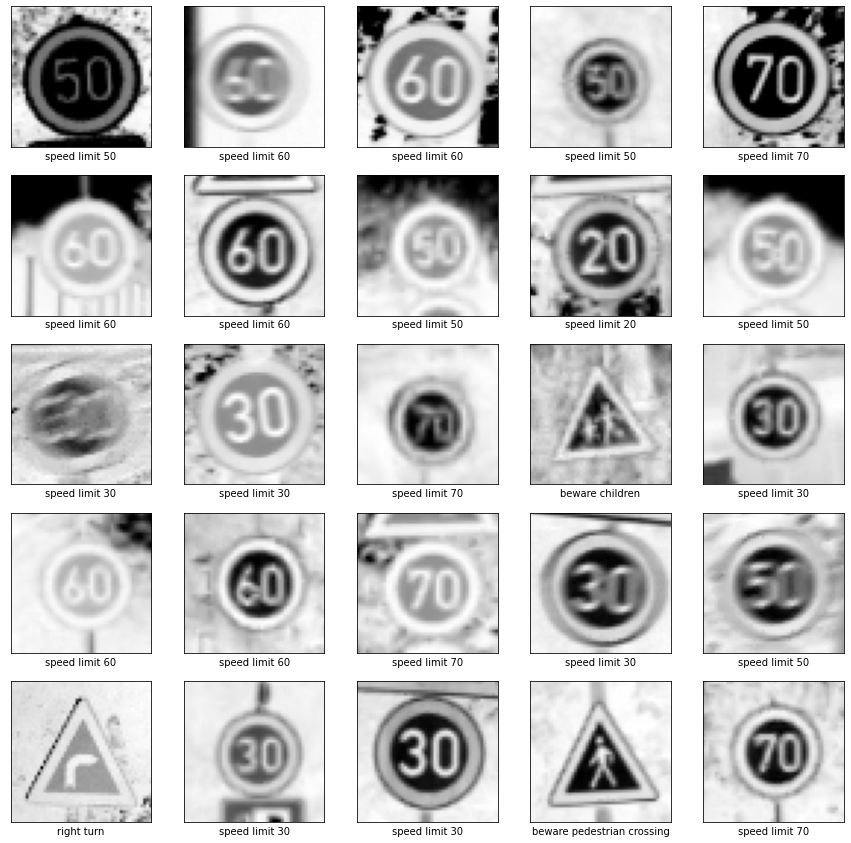

In [ ]:
import random

img_matrix = np.array([x.reshape(48, 48) for x in datasets['x_train_gr_smpl'].to_numpy() / 255.0])
plt.figure(figsize=(15,15))
for i in range(25):
    xx = random.randrange(0, 9690)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img_matrix[xx], cmap=plt.cm.binary)
    plt.xlabel(class_names[datasets['y_train_smpl']['0'][xx]])
plt.show()

### Logistic Regression

#### helper functions 

In [ ]:
regression_bin_results = []
regression_multi_results = []

def plot_conf_matrix(cnf_matrix, class_names):
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

def logreg_bin_model(X,y):
    logreg = LogisticRegression(solver="lbfgs", max_iter=10**5, random_state=42)
    logreg.fit(X, y)
    return logreg

def logreg_multi_model(X,y):
    softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42, max_iter=10**100)
    softmax_reg.fit(X, y)
    return softmax_reg

def evaluate_bin_logreg(regressor, X_test, y_test):
    y_pred = regressor.predict(X_test)
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    plot_conf_matrix(cnf_matrix, y_test.unique())
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    print(metrics.classification_report(y_test, y_pred))
    return cnf_matrix, accuracy, precision, recall
    
def evaluate_multi_logreg(regressor, X_test, y_test):
    y_pred = regressor.predict(X_test)
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    plot_conf_matrix(cnf_matrix, y_test.unique())
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print(metrics.classification_report(y_test, y_pred))
    return accuracy, cnf_matrix
    
def plot_roc(regressor, X_test, y_test):
    y_pred_proba = regressor.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    xs = np.linspace(0, 1, 20); ys = np.sin(xs)

    fig = plt.figure()
    axes = fig.add_subplot(1,1,1)
    axes.plot(xs, ys)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

def tpfp_rates(cnf_matrix):
    FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
    FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
    TP = np.diag(cnf_matrix)
    TN = cnf_matrix.sum() - (FP + FN + TP)
    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    return TPR, FPR

#### Training Data with logistic regressor with full train and test datasets and then apply cross validation on the training data

              precision    recall  f1-score   support

           0       0.64      0.47      0.54        60
           1       0.86      0.90      0.88       720
           2       0.91      0.93      0.92       750
           3       0.93      0.97      0.95       450
           4       0.94      0.93      0.93       660
           5       0.86      1.00      0.92        60
           6       0.75      0.82      0.78        90
           7       0.97      0.50      0.66        60
           8       0.97      0.64      0.77       150
           9       0.76      0.98      0.85        90

    accuracy                           0.89      3090
   macro avg       0.86      0.81      0.82      3090
weighted avg       0.90      0.89      0.89      3090



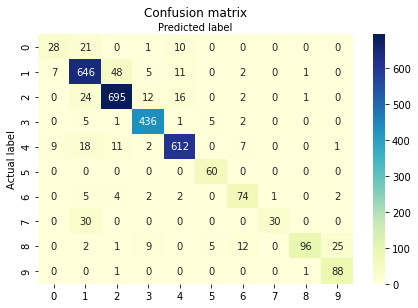

In [ ]:
X_train_orig = datasets['x_train_gr_smpl'].to_numpy() / 255.0
y_train_orig = datasets['y_train_smpl']['0']
X_test_orig = datasets['x_test_gr_smpl'].to_numpy() / 255.0
y_test_orig = datasets['y_test_smpl']['0']
regressor_orig = logreg_multi_model(X_train_orig, y_train_orig)
accuracy_orig, cnf_matrix_orig = evaluate_multi_logreg(regressor_orig, X_test_orig,y_test_orig)

In [ ]:
scores_orig = cross_val_score(regressor_orig, X_train_orig,y_train_orig, cv=10)

regression_multi_results.append({
    'train_dataset_x': 'x_train_gr_smpl', 
    'train_dataset_y': 'y_train_smpl', 
    'train_shape': X_train_orig.shape,
    'test_dataset_x': 'x_test_gr_smpl', 
    'test_dataset_y': 'y_test_smpl',
    'test_shape': X_test_orig.shape,
    'accuracy': accuracy_orig,
    'cross_val_10folds': scores_orig,
    'confusion_matrix': cnf_matrix_orig
    
})

In [ ]:
regression_multi_results

[{'accuracy': 0.8948220064724919,
  'confusion_matrix': array([[ 28,  21,   0,   1,  10,   0,   0,   0,   0,   0],
         [  7, 646,  48,   5,  11,   0,   2,   0,   1,   0],
         [  0,  24, 695,  12,  16,   0,   2,   0,   1,   0],
         [  0,   5,   1, 436,   1,   5,   2,   0,   0,   0],
         [  9,  18,  11,   2, 612,   0,   7,   0,   0,   1],
         [  0,   0,   0,   0,   0,  60,   0,   0,   0,   0],
         [  0,   5,   4,   2,   2,   0,  74,   1,   0,   2],
         [  0,  30,   0,   0,   0,   0,   0,  30,   0,   0],
         [  0,   2,   1,   9,   0,   5,  12,   0,  96,  25],
         [  0,   0,   1,   0,   0,   0,   0,   0,   1,  88]]),
  'cross_val_10folds': array([0.76780186, 0.89473684, 0.89680083, 0.91124871, 0.88441692,
         0.90402477, 0.85345717, 0.87925697, 0.89370485, 0.92053664]),
  'test_dataset_x': 'x_test_gr_smpl',
  'test_dataset_y': 'y_test_smpl',
  'test_shape': (3090, 2304),
  'train_dataset_x': 'x_train_gr_smpl',
  'train_dataset_y': 'y_train_

Training Data with logistic regressor with ~5000 train instance and ~7000 test datasets

              precision    recall  f1-score   support

           0       0.77      0.67      0.72       147
           1       0.88      0.89      0.89      1637
           2       0.91      0.92      0.92      1698
           3       0.95      0.97      0.96      1053
           4       0.94      0.94      0.94      1465
           5       0.92      0.91      0.92       161
           6       0.81      0.86      0.84       249
           7       0.97      0.77      0.86       160
           8       0.96      0.84      0.90       399
           9       0.86      0.91      0.89       191

    accuracy                           0.91      7160
   macro avg       0.90      0.87      0.88      7160
weighted avg       0.91      0.91      0.91      7160



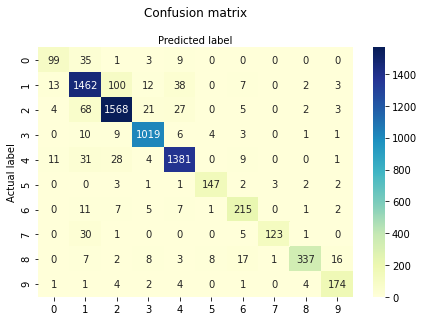

In [ ]:
X_train_4000 = datasets['x_train_4000_smpl'].to_numpy() / 255.0
y_train_4000 = datasets['y_train_4000_smpl']['0']
X_test_4000 = datasets['x_test_4000_smpl'].to_numpy() / 255.0
y_test_4000 = datasets['y_test_4000_smpl']['0']
regressor_4000 = logreg_multi_model(X_train_4000, y_train_4000)
accuracy_4000, cnf_matrix_4000 = evaluate_multi_logreg(regressor_4000, X_test_4000,y_test_4000)

In [ ]:
scores_4000 = cross_val_score(regressor_4000, X_train_4000,y_train_4000, cv=10)

regression_multi_results.append({
    'train_dataset_x': 'x_train_4000_smpl', 
    'train_dataset_y': 'y_train_4000_smpl', 
    'train_shape': X_train_4000.shape,
    'test_dataset_x': 'x_test_4000_smpl', 
    'test_dataset_y': 'y_test_4000_smpl',
    'test_shape': X_test_4000.shape,
    'accuracy': accuracy_4000,
    'cross_val_10folds': scores_4000,
    'confusion_matrix': cnf_matrix_4000
    
})

Training Data with logistic regressor with ~690 train instance and ~12000 test datasets

              precision    recall  f1-score   support

           0       0.47      0.37      0.41       252
           1       0.82      0.79      0.80      2801
           2       0.81      0.88      0.84      2845
           3       0.85      0.90      0.87      1755
           4       0.88      0.89      0.89      2496
           5       0.92      0.69      0.79       261
           6       0.71      0.83      0.76       417
           7       0.88      0.79      0.83       281
           8       0.82      0.71      0.76       652
           9       0.77      0.56      0.65       342

    accuracy                           0.83     12102
   macro avg       0.79      0.74      0.76     12102
weighted avg       0.82      0.83      0.82     12102



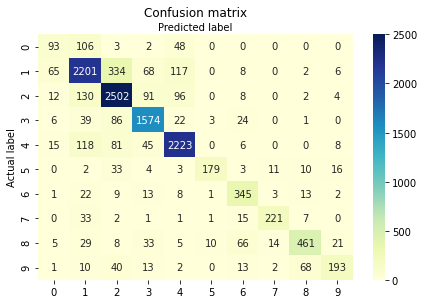

In [ ]:
X_train_9000 = datasets['x_train_9000_smpl'].to_numpy() / 255.0
y_train_9000 = datasets['y_train_9000_smpl']['0']
X_test_9000 = datasets['x_test_9000_smpl'].to_numpy() / 255.0
y_test_9000 = datasets['y_test_9000_smpl']['0']
regressor_9000 = logreg_multi_model(X_train_9000, y_train_9000)
accuracy_9000, cnf_matrix_9000 = evaluate_multi_logreg(regressor_9000, X_test_9000,y_test_9000)

# regression_multi_results.append({
#     'train_dataset_x': 'x_train_9000_smpl', 
#     'train_dataset_y': 'y_train_9000_smpl', 
#     'train_shape': X_train.shape,
#     'test_dataset_x': 'x_test_9000_smpl', 
#     'test_dataset_y': 'y_test_9000_smpl',
#     'test_shape': X_test.shape,
#     'accuracy': accuracy,
#     'confusion_matrix': cnf_matrix
# })

In [ ]:
scores_9000 = cross_val_score(regressor_9000, X_train_9000,y_train_9000, cv=10)

regression_multi_results.append({
    'train_dataset_x': 'x_train_9000_smpl', 
    'train_dataset_y': 'y_train_9000_smpl', 
    'train_shape': X_train_9000.shape,
    'test_dataset_x': 'x_test_9000_smpl', 
    'test_dataset_y': 'y_test_9000_smpl',
    'test_shape': X_test_9000.shape,
    'accuracy': accuracy_9000,
    'cross_val_10folds': scores_9000,
    'confusion_matrix': cnf_matrix_9000
    
})

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [ ]:
multi_df = pd.DataFrame(regression_multi_results)
multi_df.head()

,train_dataset_x,train_dataset_y,train_shape,test_dataset_x,test_dataset_y,test_shape,accuracy,cross_val_10folds,confusion_matrix
0,x_train_gr_smpl,y_train_smpl,"(9690, 2304)",x_test_gr_smpl,y_test_smpl,"(3090, 2304)",0.894822,"[0.7667698658410733, 0.8947368421052632, 0.896...","[[28, 21, 0, 1, 10, 0, 0, 0, 0, 0], [7, 646, 4..."
1,x_train_4000_smpl,y_train_4000_smpl,"(5620, 2304)",x_test_4000_smpl,y_test_4000_smpl,"(7160, 2304)",0.911313,"[0.9395017793594306, 0.9306049822064056, 0.927...","[[99, 35, 1, 3, 9, 0, 0, 0, 0, 0], [13, 1462, ..."
2,x_train_9000_smpl,y_train_9000_smpl,"(678, 2304)",x_test_9000_smpl,y_test_9000_smpl,"(12102, 2304)",0.825649,"[0.8382352941176471, 0.8823529411764706, 0.808...","[[93, 106, 3, 2, 48, 0, 0, 0, 0, 0], [65, 2201..."


#### Training Sample (bin) Data with logistic regressor

Training Data with logistic regressor for smpl_0
              precision    recall  f1-score   support

           0       0.54      0.42      0.47        60
           1       0.99      0.99      0.99      3030

    accuracy                           0.98      3090
   macro avg       0.77      0.70      0.73      3090
weighted avg       0.98      0.98      0.98      3090



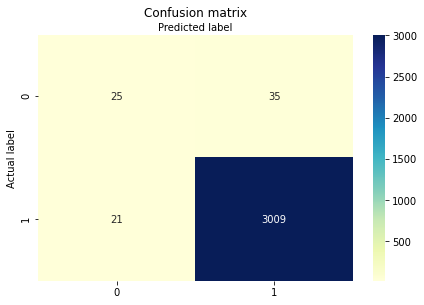

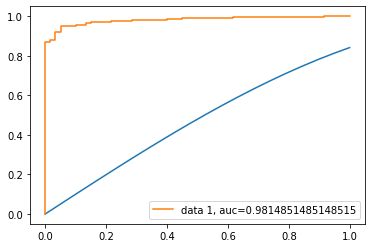

Training Data with logistic regressor for smpl_1
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       720
           1       0.94      0.96      0.95      2370

    accuracy                           0.92      3090
   macro avg       0.90      0.89      0.89      3090
weighted avg       0.92      0.92      0.92      3090



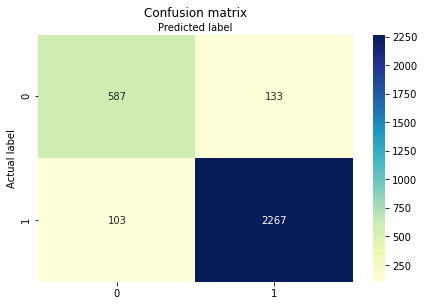

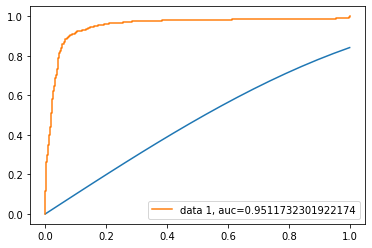

Training Data with logistic regressor for smpl_2
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       750
           1       0.94      0.95      0.95      2340

    accuracy                           0.92      3090
   macro avg       0.90      0.89      0.89      3090
weighted avg       0.92      0.92      0.92      3090



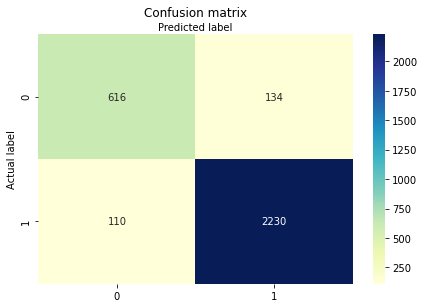

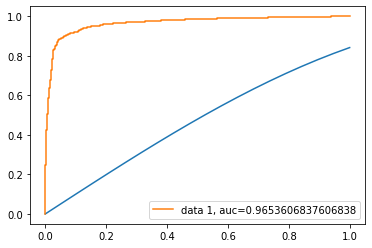

Training Data with logistic regressor for smpl_3
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       450
           1       0.99      0.99      0.99      2640

    accuracy                           0.99      3090
   macro avg       0.97      0.98      0.98      3090
weighted avg       0.99      0.99      0.99      3090



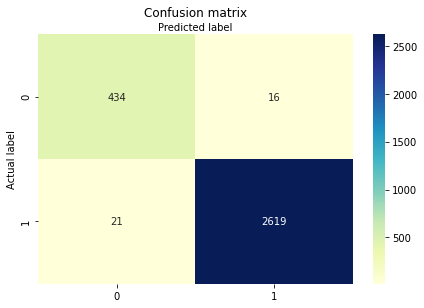

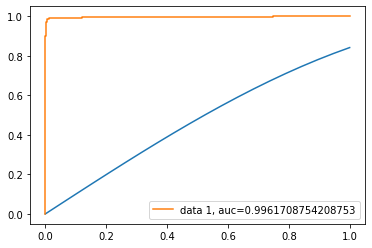

Training Data with logistic regressor for smpl_4
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       660
           1       0.97      0.97      0.97      2430

    accuracy                           0.95      3090
   macro avg       0.93      0.93      0.93      3090
weighted avg       0.95      0.95      0.95      3090



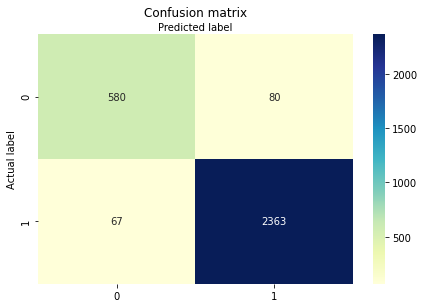

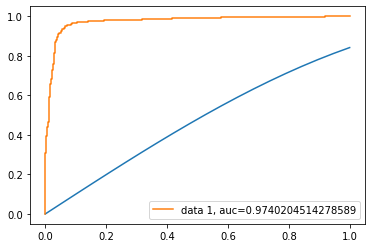

Training Data with logistic regressor for smpl_5
              precision    recall  f1-score   support

           0       0.88      0.50      0.64        60
           1       0.99      1.00      0.99      3030

    accuracy                           0.99      3090
   macro avg       0.94      0.75      0.82      3090
weighted avg       0.99      0.99      0.99      3090



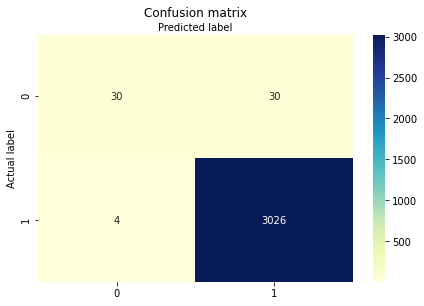

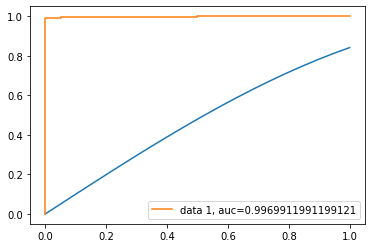

Training Data with logistic regressor for smpl_6
              precision    recall  f1-score   support

           0       0.74      0.93      0.82        90
           1       1.00      0.99      0.99      3000

    accuracy                           0.99      3090
   macro avg       0.87      0.96      0.91      3090
weighted avg       0.99      0.99      0.99      3090



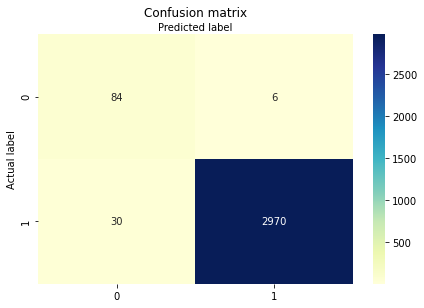

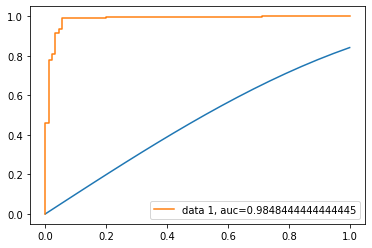

Training Data with logistic regressor for smpl_7
              precision    recall  f1-score   support

           0       0.97      0.50      0.66        60
           1       0.99      1.00      0.99      3030

    accuracy                           0.99      3090
   macro avg       0.98      0.75      0.83      3090
weighted avg       0.99      0.99      0.99      3090



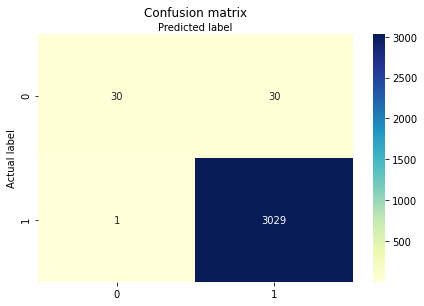

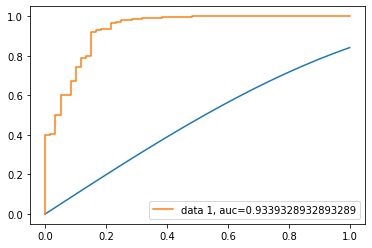

Training Data with logistic regressor for smpl_8
              precision    recall  f1-score   support

           0       0.96      0.73      0.83       150
           1       0.99      1.00      0.99      2940

    accuracy                           0.99      3090
   macro avg       0.97      0.86      0.91      3090
weighted avg       0.98      0.99      0.98      3090



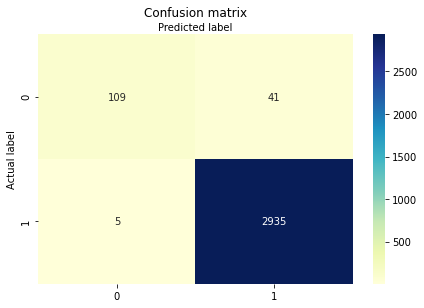

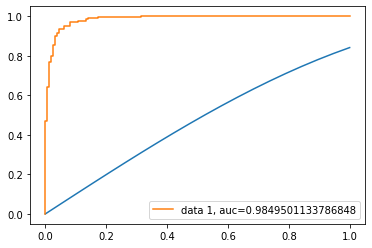

Training Data with logistic regressor for smpl_9
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        90
           1       1.00      0.99      0.99      3000

    accuracy                           0.99      3090
   macro avg       0.88      0.95      0.91      3090
weighted avg       0.99      0.99      0.99      3090



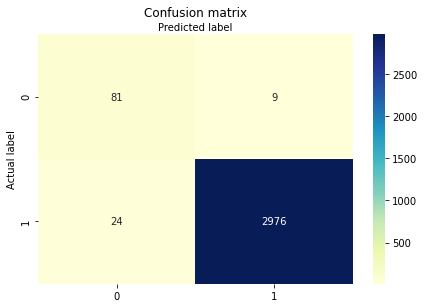

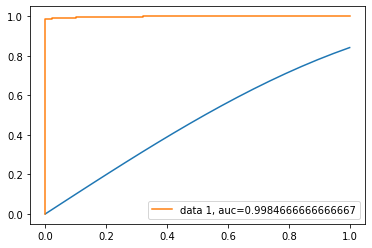

In [ ]:
for i in range(10):
  print('Training Data with logistic regressor for smpl_%d' % i)
  X_train_smpl = datasets['x_train_gr_smpl'].to_numpy() / 255.0
  y_train_smpl = datasets['y_train_smpl_%d' % i]['0']
  X_test_smpl = datasets['x_test_gr_smpl'].to_numpy() / 255.0
  y_test_smpl = datasets['y_test_smpl_%d' % i]['0']

  regressor_smpl = logreg_bin_model(X_train_smpl,y_train_smpl)
  cnf_matrix_smpl, accuracy_smpl, precision_smpl, recall_smpl = evaluate_bin_logreg(regressor_smpl, X_test_smpl,y_test_smpl)
  plot_roc(regressor_smpl, X_test_smpl,y_test_smpl)
  TPR, FPR = tpfp_rates(cnf_matrix_smpl)
  regression_bin_results.append({
      'train_dataset_x': 'x_train_gr_smpl', 
      'train_dataset_y': 'y_train_smpl_%d' % i, 
      'test_dataset_x': 'x_test_gr_smpl', 
      'test_dataset_y': 'y_test_smpl_%d' % i,
      'accuracy': accuracy_smpl,
      'percision': precision_smpl,
      'recall': recall_smpl,
      'TP Rate': TPR,
      'FP Rate': FPR,
      'confusion_matrix': cnf_matrix_smpl
      
  })

In [ ]:
bin_df = pd.DataFrame(regression_bin_results)
bin_df.head(10)

,train_dataset_x,train_dataset_y,test_dataset_x,test_dataset_y,accuracy,percision,recall,TP Rate,FP Rate,confusion_matrix
0,x_train_gr_smpl,y_train_smpl_0,x_test_gr_smpl,y_test_smpl_0,0.981877,0.988502,0.993069,"[0.4166666666666667, 0.9930693069306931]","[0.006930693069306931, 0.5833333333333334]","[[25, 35], [21, 3009]]"
1,x_train_gr_smpl,y_train_smpl_1,x_test_gr_smpl,y_test_smpl_1,0.923625,0.944583,0.956540,"[0.8152777777777778, 0.9565400843881856]","[0.043459915611814344, 0.18472222222222223]","[[587, 133], [103, 2267]]"
2,x_train_gr_smpl,y_train_smpl_2,x_test_gr_smpl,y_test_smpl_2,0.921036,0.943316,0.952991,"[0.8213333333333334, 0.9529914529914529]","[0.04700854700854701, 0.17866666666666667]","[[616, 134], [110, 2230]]"
3,x_train_gr_smpl,y_train_smpl_3,x_test_gr_smpl,y_test_smpl_3,0.988026,0.993928,0.992045,"[0.9644444444444444, 0.9920454545454546]","[0.007954545454545454, 0.035555555555555556]","[[434, 16], [21, 2619]]"
4,x_train_gr_smpl,y_train_smpl_4,x_test_gr_smpl,y_test_smpl_4,0.952427,0.967253,0.972428,"[0.8787878787878788, 0.9724279835390947]","[0.02757201646090535, 0.12121212121212122]","[[580, 80], [67, 2363]]"
5,x_train_gr_smpl,y_train_smpl_5,x_test_gr_smpl,y_test_smpl_5,0.988997,0.990183,0.998680,"[0.5, 0.9986798679867986]","[0.0013201320132013201, 0.5]","[[30, 30], [4, 3026]]"
6,x_train_gr_smpl,y_train_smpl_6,x_test_gr_smpl,y_test_smpl_6,0.988350,0.997984,0.990000,"[0.9333333333333333, 0.99]","[0.01, 0.06666666666666667]","[[84, 6], [30, 2970]]"
7,x_train_gr_smpl,y_train_smpl_7,x_test_gr_smpl,y_test_smpl_7,0.989968,0.990193,0.999670,"[0.5, 0.9996699669966996]","[0.00033003300330033004, 0.5]","[[30, 30], [1, 3029]]"
8,x_train_gr_smpl,y_train_smpl_8,x_test_gr_smpl,y_test_smpl_8,0.985113,0.986223,0.998299,"[0.7266666666666667, 0.9982993197278912]","[0.0017006802721088435, 0.2733333333333333]","[[109, 41], [5, 2935]]"
9,x_train_gr_smpl,y_train_smpl_0,x_test_gr_smpl,y_test_smpl_0,0.981877,0.988502,0.993069,"[0.4166666666666667, 0.9930693069306931]","[0.006930693069306931, 0.5833333333333334]","[[25, 35], [21, 3009]]"


## Neural Networks

#### Import Nerual Networks libraries

In [14]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

import tensorflow as tf
print(tf.__version__)

2.3.0


#### Nerual Networks helpers

In [ ]:
def NN_1():    
  model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(48, 48)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
  ])
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

def NN_2():    
  model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(48, 48)),
  tf.keras.layers.Dense(128, activation='tanh', input_shape=(48, 48)),
        tf.keras.layers.Dense(200, activation='tanh'),
        tf.keras.layers.Dense(200, activation='tanh'),
        tf.keras.layers.Dense(10, activation='softmax')
  ])
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model


def NN_3():    
  model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(48, 48)),
  tf.keras.layers.Dense(128, activation='tanh', input_shape=(48, 48)),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
  ])
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

def plot_conf_matrix(cnf_matrix, class_names):
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

def evaluate_nn(model, X_test, y_test, class_names):
    yhat_classes = model.predict_classes(X_test, verbose=0)
    yhat = np.reshape(yhat_classes, (y_test.shape[0],1))
    y_pred = model.predict(X_test, verbose=0)
    accuracy = accuracy_score(y_test, yhat)
    print('Accuracy: %f' % accuracy)
    cm = confusion_matrix(y_test, yhat)
    plot_conf_matrix(cm, class_names)
    print(classification_report(y_test, yhat, target_names=class_names))
    print('ROC Curve Area = ',roc_auc_score(y_test, y_pred, average='weighted',multi_class='ovr'))

#### Traingin and Evaluating Neural Nets models

(9690, 48, 48) (3090, 48, 48) (9690,) (3090,)
Epoch 1/10
303/303 [==============================] - 1s 3ms/step - loss: 1.5553 - accuracy: 0.4621
Epoch 2/10
303/303 [==============================] - 1s 3ms/step - loss: 1.0712 - accuracy: 0.6497
Epoch 3/10
303/303 [==============================] - 1s 3ms/step - loss: 0.7968 - accuracy: 0.7836
Epoch 4/10
303/303 [==============================] - 1s 3ms/step - loss: 0.6420 - accuracy: 0.8316
Epoch 5/10
303/303 [==============================] - 1s 3ms/step - loss: 0.5361 - accuracy: 0.8621
Epoch 6/10
303/303 [==============================] - 1s 3ms/step - loss: 0.4517 - accuracy: 0.8821
Epoch 7/10
303/303 [==============================] - 1s 3ms/step - loss: 0.4015 - accuracy: 0.8961
Epoch 8/10
303/303 [==============================] - 1s 3ms/step - loss: 0.3609 - accuracy: 0.9036
Epoch 9/10
303/303 [==============================] - 1s 3ms/step - loss: 0.3247 - accuracy: 0.9142
Epoch 10/10
303/303 [==============================] -

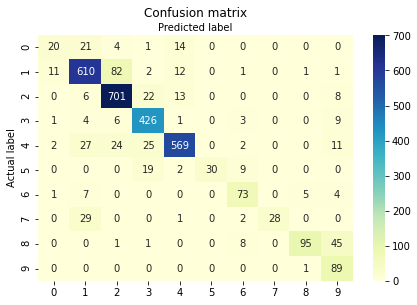

In [ ]:
X_train_orig = np.array([x.reshape(48, 48) for x in datasets['x_train_gr_smpl'].to_numpy() / 255.0])
X_test_orig = np.array([x.reshape(48, 48) for x in datasets['x_test_gr_smpl'].to_numpy() / 255.0])
y_train_orig = datasets['y_train_smpl']['0'].to_numpy()
y_test_orig = datasets['y_test_smpl']['0'].to_numpy()

print(X_train_orig.shape, X_test_orig.shape, y_train_orig.shape, y_test_orig.shape)

model_1 = NN_1()
model_1.fit(X_train_orig, y_train_orig, epochs=10)
evaluate_nn(model_1, X_test_orig, y_test_orig, class_names)

In [ ]:
cross_val_score(KerasClassifier(build_fn=NN_1,epochs=10,batch_size=100,verbose=0), X_train_orig, y_train_orig, cv=10)

array([0.88028896, 0.51393187, 0.67389059, 0.79463363, 0.7647059 ,
       0.38080496, 0.68627453, 0.72136223, 0.38906088, 0.05882353])

Epoch 1/10
303/303 [==============================] - 1s 4ms/step - loss: 1.2986 - accuracy: 0.5023
Epoch 2/10
303/303 [==============================] - 1s 4ms/step - loss: 0.6790 - accuracy: 0.7608
Epoch 3/10
303/303 [==============================] - 1s 4ms/step - loss: 0.5150 - accuracy: 0.8273
Epoch 4/10
303/303 [==============================] - 1s 4ms/step - loss: 0.3784 - accuracy: 0.8795
Epoch 5/10
303/303 [==============================] - 1s 4ms/step - loss: 0.3779 - accuracy: 0.8666
Epoch 6/10
303/303 [==============================] - 1s 4ms/step - loss: 0.3043 - accuracy: 0.8967
Epoch 7/10
303/303 [==============================] - 1s 4ms/step - loss: 0.3118 - accuracy: 0.8970
Epoch 8/10
303/303 [==============================] - 1s 4ms/step - loss: 0.2906 - accuracy: 0.9020
Epoch 9/10
303/303 [==============================] - 1s 4ms/step - loss: 0.2717 - accuracy: 0.9050
Epoch 10/10
303/303 [==============================] - 1s 4ms/step - loss: 0.2483 - accuracy: 0.9169

array([0.78947371, 0.78534573, 0.73374611, 0.93188852, 0.73065013,
       0.66769868, 0.81527346, 0.89473683, 0.44169247, 0.11971104])

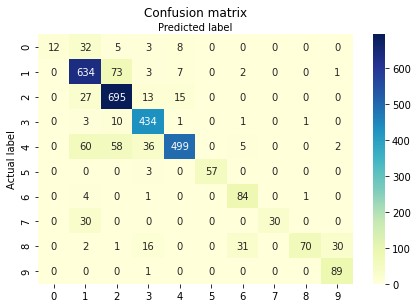

In [ ]:
model_2 = NN_2()
model_2.fit(X_train_orig, y_train_orig, epochs=10)
evaluate_nn(model_2, X_test_orig, y_test_orig, class_names)
cross_val_score(KerasClassifier(build_fn=NN_2,epochs=50,batch_size=200,verbose=0), X_train_orig, y_train_orig, cv=10)

Epoch 1/100
303/303 [==============================] - 1s 3ms/step - loss: 1.2773 - accuracy: 0.5188
Epoch 2/100
303/303 [==============================] - 1s 4ms/step - loss: 0.6717 - accuracy: 0.7573
Epoch 3/100
303/303 [==============================] - 1s 3ms/step - loss: 0.5383 - accuracy: 0.8110
Epoch 4/100
303/303 [==============================] - 1s 3ms/step - loss: 0.4045 - accuracy: 0.8595
Epoch 5/100
303/303 [==============================] - 1s 4ms/step - loss: 0.3778 - accuracy: 0.8707
Epoch 6/100
303/303 [==============================] - 1s 3ms/step - loss: 0.3464 - accuracy: 0.8807
Epoch 7/100
303/303 [==============================] - 1s 4ms/step - loss: 0.3044 - accuracy: 0.8976
Epoch 8/100
303/303 [==============================] - 1s 3ms/step - loss: 0.2670 - accuracy: 0.9095
Epoch 9/100
303/303 [==============================] - 1s 3ms/step - loss: 0.2722 - accuracy: 0.9100
Epoch 10/100
303/303 [==============================] - 1s 3ms/step - loss: 0.2193 - accura

array([0.37770897, 0.74613005, 0.65737873, 0.82249743, 0.80701756,
       0.68421054, 0.85861713, 0.7729618 , 0.44478846, 0.09700722])

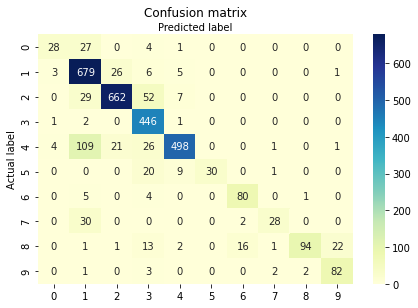

In [ ]:
model_3 = NN_3()
model_3.fit(X_train_orig, y_train_orig, epochs=100)
evaluate_nn(model_3, X_test_orig, y_test_orig, class_names)
cross_val_score(KerasClassifier(build_fn=NN_3,epochs=100,batch_size=200,verbose=0), X_train_orig, y_train_orig, cv=10)

(5620, 48, 48) (7160, 48, 48) (5620,) (7160,)
Epoch 1/10
176/176 [==============================] - 1s 4ms/step - loss: 1.6478 - accuracy: 0.4279
Epoch 2/10
176/176 [==============================] - 1s 4ms/step - loss: 1.2407 - accuracy: 0.5826
Epoch 3/10
176/176 [==============================] - 1s 4ms/step - loss: 0.9759 - accuracy: 0.7066
Epoch 4/10
176/176 [==============================] - 1s 4ms/step - loss: 0.8193 - accuracy: 0.7641
Epoch 5/10
176/176 [==============================] - 1s 4ms/step - loss: 0.6806 - accuracy: 0.8205
Epoch 6/10
176/176 [==============================] - 1s 4ms/step - loss: 0.6223 - accuracy: 0.8333
Epoch 7/10
176/176 [==============================] - 0s 3ms/step - loss: 0.5305 - accuracy: 0.8641
Epoch 8/10
176/176 [==============================] - 0s 3ms/step - loss: 0.4745 - accuracy: 0.8758
Epoch 9/10
176/176 [==============================] - 0s 3ms/step - loss: 0.4416 - accuracy: 0.8786
Epoch 10/10
176/176 [==============================] -

array([0.96263343, 0.74911034, 0.96619219, 0.95729536, 0.95373666,
       0.96619219, 0.96619219, 0.96975088, 0.97508895, 0.95551604])

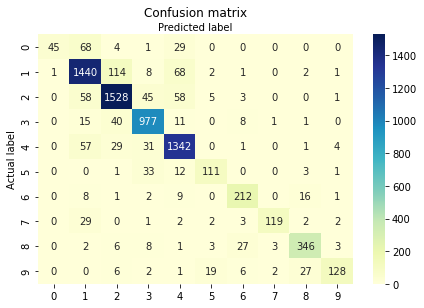

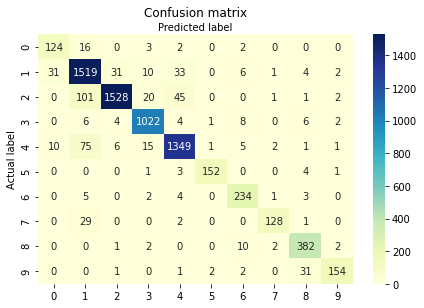

In [ ]:
X_train_4000 = np.array([x.reshape(48, 48) for x in datasets['x_train_4000_smpl'].to_numpy() / 255.0])
X_test_4000 = np.array([x.reshape(48, 48) for x in datasets['x_test_4000_smpl'].to_numpy() / 255.0])
y_train_4000 = datasets['y_train_4000_smpl']['0'].to_numpy()
y_test_4000 = datasets['y_test_4000_smpl']['0'].to_numpy()

print(X_train_4000.shape, X_test_4000.shape, y_train_4000.shape, y_test_4000.shape)

model_1_4000 = NN_1()
model_1_4000.fit(X_train_4000, y_train_4000, epochs=10)
evaluate_nn(model_1_4000, X_test_4000, y_test_4000, class_names)

model_3_4000 = NN_3()
model_3_4000.fit(X_train_4000, y_train_4000, epochs=100)
evaluate_nn(model_3_4000, X_test_4000, y_test_4000, class_names)
cross_val_score(KerasClassifier(build_fn=NN_3,epochs=100,batch_size=200,verbose=0), X_train_4000, y_train_4000, cv=10)

#### Convolutional Neural Networks

In [ ]:
X_train_orig_cnn = np.array([x.reshape(48, 48, 1) for x in datasets['x_train_gr_smpl'].to_numpy() / 255.0])
y_train_orig_cnn = datasets['y_train_smpl']['0'].to_numpy()
X_test_orig_cnn = np.array([x.reshape(48, 48, 1) for x in datasets['x_test_gr_smpl'].to_numpy() / 255.0])
y_test_orig_cnn = datasets['y_test_smpl']['0'].to_numpy()

X_train_4000_cnn = np.array([x.reshape(48, 48, 1) for x in datasets['x_train_4000_smpl'].to_numpy() / 255.0])
y_train_4000_cnn = datasets['y_train_4000_smpl']['0'].to_numpy()
X_test_4000_cnn = np.array([x.reshape(48, 48, 1) for x in datasets['x_test_4000_smpl'].to_numpy() / 255.0])
y_test_4000_cnn = datasets['y_test_4000_smpl']['0'].to_numpy()

X_train_9000_cnn = np.array([x.reshape(48, 48, 1) for x in datasets['x_train_9000_smpl'].to_numpy() / 255.0])
y_train_9000_cnn = datasets['y_train_9000_smpl']['0'].to_numpy()
X_test_9000_cnn = np.array([x.reshape(48, 48, 1) for x in datasets['x_test_9000_smpl'].to_numpy() / 255.0])
y_test_9000_cnn = datasets['y_test_9000_smpl']['0'].to_numpy()

In [ ]:
def CNN_1():
  model_cnn = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', 
                        input_shape=(48, 48, 1)),
  tf.keras.layers.Conv2D(32, (3,3), activation='tanh'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation='softmax')
  ])
  model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  model_cnn.summary()
  return model_cnn

def CNN_2():
  model_cnn = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(300, (3,3), activation='tanh', 
                        input_shape=(48, 48, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(300, (3,3), activation='tanh'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(300, activation='tanh'),
  tf.keras.layers.Dense(10, activation='softmax')
  ])
  model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  model_cnn.summary()
  return model_cnn

def CNN_3():
  model_cnn = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(300, (3,3), activation='tanh', 
                        input_shape=(48, 48, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(300, (3,3), activation='tanh'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(300, activation='tanh'),
  tf.keras.layers.Dense(10, activation='softmax')
  ])
  model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model_cnn



Accuracy: 0.911003
                            precision    recall  f1-score   support

            speed limit 20       0.77      0.57      0.65        60
            speed limit 30       0.92      0.91      0.91       720
            speed limit 50       0.92      0.94      0.93       750
            speed limit 60       0.86      0.97      0.91       450
            speed limit 70       0.97      0.94      0.95       660
                 left turn       1.00      0.87      0.93        60
                right turn       0.92      0.91      0.92        90
beware pedestrian crossing       1.00      0.52      0.68        60
           beware children       0.90      0.74      0.81       150
  beware cycle route ahead       0.71      0.99      0.83        90

                  accuracy                           0.91      3090
                 macro avg       0.90      0.83      0.85      3090
              weighted avg       0.91      0.91      0.91      3090

ROC Curve Area =  0.988066

array([0.83384931, 0.81114548, 0.73993808, 0.88854492, 0.85139316,
       0.79153764, 0.94840044, 0.91021669, 0.46955624, 0.04540764])

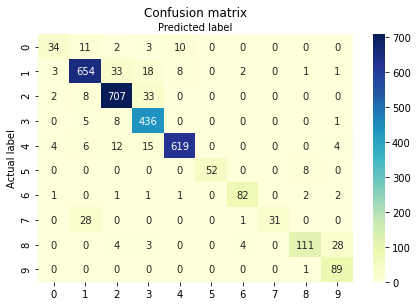

In [ ]:
# model_cnn1 = CNN_1()
# model_cnn1.fit(X_train_orig_cnn, y_train_orig_cnn, epochs=10)
evaluate_nn(model_cnn1, X_test_orig_cnn, y_test_orig_cnn, class_names)
cross_val_score(KerasClassifier(build_fn=CNN_1,epochs=10,batch_size=100,verbose=0), X_train_orig_cnn, y_train_orig_cnn, cv=10)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 46, 46, 300)       3000      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 300)       0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 21, 21, 300)       810300    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 300)       0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 30000)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 300)               9000300   
_________________________________________________________________
dense_16 (Dense)             (None, 10)              

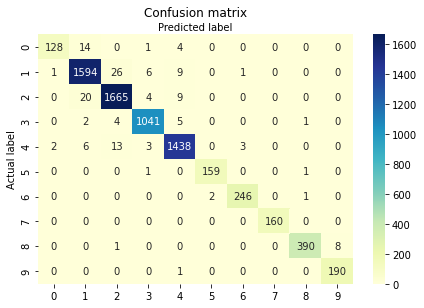

In [ ]:
model_cnn2 = CNN_2()
model_cnn2.fit(X_train_4000_cnn, y_train_4000_cnn, epochs=20)
evaluate_nn(model_cnn2, X_test_4000_cnn, y_test_4000_cnn, class_names)

In [43]:
X_train_9000_cnn = np.array([x.reshape(48, 48, 1) for x in datasets['x_train_9000_smpl'].to_numpy() / 255.0])
y_train_9000_cnn = datasets['y_train_9000_smpl']['0'].to_numpy()
X_test_9000_cnn = np.array([x.reshape(48, 48, 1) for x in datasets['x_test_9000_smpl'].to_numpy() / 255.0])
y_test_9000_cnn = datasets['y_test_9000_smpl']['0'].to_numpy()

### Research

In [38]:
def CNN_1():
  model_cnn = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', 
                        input_shape=(48, 48, 1)),
  tf.keras.layers.Conv2D(32, (3,3), activation='tanh'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation='softmax')
  ])
  # model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  # model_cnn.summary()
  return model_cnn

def CNN_LSTM():
  # cnn = CNN_1()
  model = tf.keras.models.Sequential()
  # define CNN model
  model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(1, (2,2), activation='tanh', 
                        input_shape=(48, 48, 1))))
  model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D(2,2)))
  model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten()))
  # define LSTM model
  model.add(tf.keras.layers.LSTM(200))
  model.add(tf.keras.layers.Dense(10, activation='softmax'))
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [39]:
cnn_mdl = CNN_LSTM()

In [32]:
X_train_9000_cnn.shape

(678, 48, 48, 1)

In [41]:
#cnn_mdl.fit(X_train_9000_cnn, y_train_9000_cnn, epochs=20)